In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import os
import pathlib

import scipy.stats as ss
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
#from mlxtend.plotting import plot_learning_curves
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

from tensorflow.keras.layers import Dense, Input, Flatten, Dropout, Conv2D, MaxPooling2D, GlobalAveragePooling2D, GlobalMaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization

In [4]:
#df = pd.read_csv("DE_Filter.csv")
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DE_Filter.csv')

In [5]:
df.shape

(123055, 151)

In [6]:
# Delete NA
col_names = ['B1_1.NA','B1_2.NA','B1_3.NA','B1_4.NA','B1_5.NA','B1_6.NA','B1_7.NA','B1_8.NA','B1_9.NA','B1_10.NA','B1_11.NA','B1_12.NA','E3.NA','E4.NA','E2.NA']

for i in range(len(col_names)):
    df_filter = df.drop(df[df[col_names[i]]==1].index)
    df= df_filter

df_filter = df

In [7]:
df_filter.shape

(106817, 151)

In [8]:
# dataframe without NA
df_no_na = df_filter

In [9]:
# dataframe with NA

#df_NA = pd.read_csv("DE_Filter.csv")
df_NA = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DE_Filter.csv")

In [10]:
df_no_na.shape

(106817, 151)

In [11]:
df_NA.shape

(123055, 151)

In [12]:
df1_ok = df_no_na[['B1_1.1','B1_2.1','B1_3.1','B1_4.1','B1_5.1','B1_6.1','B1_7.1','B1_8.1','B1_9.1','B1_10.1','B1_11.1','B1_12.1','B8.1','E3.1','E3.2','E3.3','E3.4','E4.1','E4.2','E4.3','E4.4','E4.5','E4.6','E4.7','E2.1','E2.2','E2.3']]

#df1_ok = df_no_na[['B1_1.1','B1_2.1','B1_3.1','B1_4.1','B1_5.1','B1_6.1','B1_7.1','B1_8.1','B1_9.1','B1_10.1','B1_11.1','B1_12.1','B8.1']]

#df_ok_NA = df_NA[['B1_1.1','B1_1.2','B1_2.1','B1_2.2','B1_3.1','B1_3.2','B1_4.1','B1_4.2','B1_5.1','B1_5.2','B1_6.1','B1_6.2','B1_7.1','B1_7.2','B1_8.1','B1_8.2','B1_9.1','B1_9.2','B1_10.1','B1_10.2','B1_11.1','B1_11.2','B1_12.1','B1_12.2','B8.1']]

df_ok_NA = df_NA[['B1_1.1','B1_1.2','B1_2.1','B1_2.2','B1_3.1','B1_3.2','B1_4.1','B1_4.2','B1_5.1','B1_5.2','B1_6.1','B1_6.2','B1_7.1','B1_7.2','B1_8.1','B1_8.2','B1_9.1','B1_9.2','B1_10.1','B1_10.2','B1_11.1','B1_11.2','B1_12.1','B1_12.2','B8.1','E3.1','E3.2','E3.3','E3.4','E4.1','E4.2','E4.3','E4.4','E4.5','E4.6','E4.7','E2.1','E2.2','E2.3']]

In [13]:
df1_ok.shape

(106817, 27)

In [14]:
df_ok_NA.shape

(123055, 39)

# Training & Test

In [15]:
X = df1_ok.drop(['B8.1'], axis=1)
Y = df1_ok['B8.1']

X_NA = df_ok_NA.drop(['B8.1'], axis=1)
Y_NA = df_ok_NA['B8.1']

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)


X_train_NA, X_test_NA, Y_train_NA, Y_test_NA = train_test_split(X_NA, Y_NA, test_size = 0.2, random_state=2)

In [17]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print()
print(X_train_NA.shape)
print(X_test_NA.shape)
print(Y_train_NA.shape)
print(Y_test_NA.shape)

(85453, 26)
(21364, 26)
(85453,)
(21364,)

(98444, 38)
(24611, 38)
(98444,)
(24611,)


In [ ]:
import shap
# Need to load JS vis in the notebook
shap.initjs()

## Decision Tree

### df1_ok

In [ ]:
max_depth = np.arange(1, 10)
min_samples_leaf = [50, 100, 200]

# GridSearchCV
param_grid = { 'criterion':['gini','entropy'],'max_depth': max_depth,'min_samples_leaf': min_samples_leaf}

In [ ]:
dtree_model=tree.DecisionTreeClassifier()

dtree_model = GridSearchCV(dtree_model, param_grid, cv=3)

dtree_model=dtree_model.fit(X_train, Y_train)
print(dtree_model.best_params_)

{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 100}


Accuracy: 0.9592772888972103
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     20295
           1       0.65      0.41      0.50      1069

    accuracy                           0.96     21364
   macro avg       0.81      0.70      0.74     21364
weighted avg       0.95      0.96      0.95     21364

[[20060   235]
 [  635   434]]


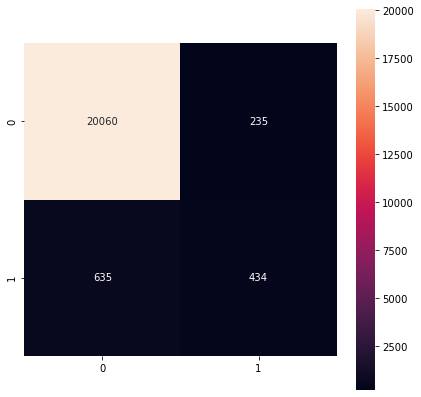

In [ ]:
my_model = dtree_model.best_estimator_
my_tree=my_model.fit(X_train, Y_train)

y_predicted = my_tree.predict(X_test)

print('Accuracy:',accuracy_score(Y_test, y_predicted))
print(classification_report(Y_test, y_predicted))
matrix = confusion_matrix(Y_test, y_predicted)
print(matrix)
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()
#print(confusion_matrix(Y_test, y_predicted))

In [ ]:
my_tree.get_depth()
my_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 100,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

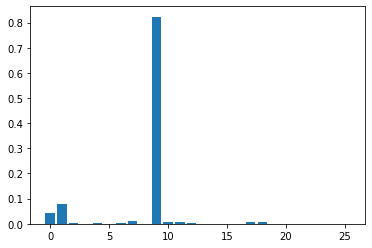

In [ ]:
from matplotlib import pyplot
importance=my_tree.feature_importances_
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
'''
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

col_names= ['B1_1.1','B1_2.1','B1_3.1','B1_4.1','B1_5.1','B1_6.1','B1_7.1','B1_8.1','B1_9.1','B1_10.1','B1_11.1','B1_12.1','E3.1','E3.2','E3.3','E3.4','E4.1','E4.2','E4.3','E4.4','E4.5','E4.6','E4.7','E2.1','E2.2','E2.3']
dot_data = export_graphviz(my_tree,
                           feature_names=col_names)
graph = graph_from_dot_data(dot_data)
graph.write_png('GE_tree_df1_ok.png')
'''

In [ ]:
explainer = shap.TreeExplainer(my_tree)
shap_values = explainer.shap_values(X_train)

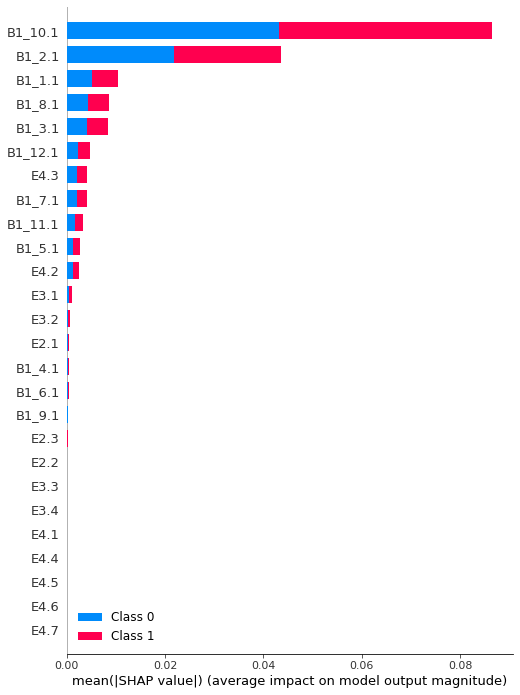

In [ ]:
shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns, max_display=len(X_train))

## Testing BRAZIL

In [18]:
#df_BR = pd.read_csv("BR_Filter.csv")

df_BR = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BR_Filter.csv')

In [19]:
df_BR.shape

(113024, 151)

In [20]:
# Delete NA
col_names = ['B1_1.NA','B1_2.NA','B1_3.NA','B1_4.NA','B1_5.NA','B1_6.NA','B1_7.NA','B1_8.NA','B1_9.NA','B1_10.NA','B1_11.NA','B1_12.NA','E3.NA','E4.NA','E2.NA']
#col_names = ['B1_1.NA','B1_2.NA','B1_3.NA','B1_4.NA','B1_5.NA','B1_6.NA','B1_7.NA','B1_8.NA','B1_9.NA','B1_10.NA','B1_11.NA','B1_12.NA']

for i in range(len(col_names)):
    df_filter_BR = df_BR.drop(df_BR[df_BR[col_names[i]]==1].index)
    df_BR= df_filter_BR

df_filter_BR = df_BR

In [21]:
df_filter_BR.shape

(83208, 151)

In [22]:
# dataframe without NA
df1_BR = df_filter_BR

In [23]:
df1_BR.shape

(83208, 151)

In [24]:
# dataframe with NA

#df_NA_BR = pd.read_csv("BR_Filter.csv")
df_NA_BR = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BR_Filter.csv')

In [25]:
df_NA_BR.shape

(113024, 151)

In [26]:
df1_ok_BR = df1_BR[['B1_1.1','B1_2.1','B1_3.1','B1_4.1','B1_5.1','B1_6.1','B1_7.1','B1_8.1','B1_9.1','B1_10.1','B1_11.1','B1_12.1','B8.1','E3.1','E3.2','E3.3','E3.4','E4.1','E4.2','E4.3','E4.4','E4.5','E4.6','E4.7','E2.1','E2.2','E2.3']]

df_ok_NA_BR = df_NA_BR[['B1_1.1','B1_1.2','B1_2.1','B1_2.2','B1_3.1','B1_3.2','B1_4.1','B1_4.2','B1_5.1','B1_5.2','B1_6.1','B1_6.2','B1_7.1','B1_7.2','B1_8.1','B1_8.2','B1_9.1','B1_9.2','B1_10.1','B1_10.2','B1_11.1','B1_11.2','B1_12.1','B1_12.2','B8.1','E3.1','E3.2','E3.3','E3.4','E4.1','E4.2','E4.3','E4.4','E4.5','E4.6','E4.7','E2.1','E2.2','E2.3']]

In [27]:
df1_ok_BR.shape

(83208, 27)

In [28]:
df_ok_NA_BR.shape

(113024, 39)

In [29]:
X_BR = df1_ok_BR.drop(['B8.1'], axis=1)
Y_BR = df1_ok_BR['B8.1']

X_NA_BR = df_ok_NA_BR.drop(['B8.1'], axis=1)
Y_NA_BR = df_ok_NA_BR['B8.1']

Accuracy: 0.6665104316892606
              precision    recall  f1-score   support

           0       0.60      0.95      0.73     40060
           1       0.90      0.40      0.56     43148

    accuracy                           0.67     83208
   macro avg       0.75      0.68      0.64     83208
weighted avg       0.75      0.67      0.64     83208

[[38098  1962]
 [25787 17361]]


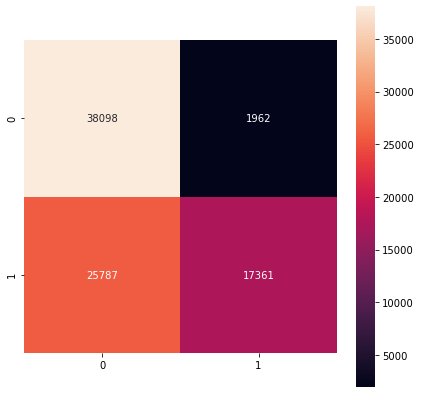

In [ ]:
y_predicted_BR = my_model.predict(X_BR)

print('Accuracy:',accuracy_score(Y_BR, y_predicted_BR))
print(classification_report(Y_BR, y_predicted_BR))
matrix = confusion_matrix(Y_BR, y_predicted_BR)
print(matrix)
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()
#print(confusion_matrix(Y_test, y_predicted))

### df_ok_na

In [ ]:
max_depth = np.arange(1, 10)
min_samples_leaf = [50, 100, 200]

# GridSearchCV
param_grid = { 'criterion':['gini','entropy'],'max_depth': max_depth,'min_samples_leaf': min_samples_leaf}

In [ ]:
dtree_model_NA=tree.DecisionTreeClassifier()

dtree_model_NA = GridSearchCV(dtree_model_NA, param_grid, cv=3)

dtree_model_NA=dtree_model_NA.fit(X_train_NA, Y_train_NA)
print(dtree_model_NA.best_params_)

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 100}


Accuracy: 0.9567672991751656
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     23238
           1       0.69      0.41      0.51      1373

    accuracy                           0.96     24611
   macro avg       0.83      0.70      0.74     24611
weighted avg       0.95      0.96      0.95     24611

[[22989   249]
 [  815   558]]


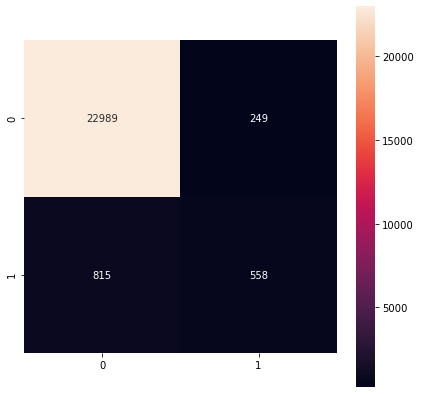

In [ ]:
my_model_NA = dtree_model_NA.best_estimator_
my_tree_NA=my_model_NA.fit(X_train_NA, Y_train_NA)

y_predicted = my_tree_NA.predict(X_test_NA)

print('Accuracy:',accuracy_score(Y_test_NA, y_predicted))
print(classification_report(Y_test_NA, y_predicted))
matrix = confusion_matrix(Y_test_NA, y_predicted)
print(matrix)
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()
#print(confusion_matrix(Y_test_NA, y_predicted))

In [ ]:
my_tree_NA.get_depth()
my_tree_NA.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 100,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

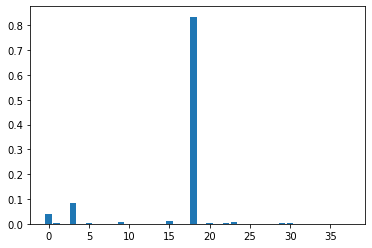

In [ ]:
from matplotlib import pyplot
importance=my_tree_NA.feature_importances_
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
'''
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

col_names= ['B1_1.1','B1_1.2','B1_2.1','B1_2.2','B1_3.1','B1_3.2','B1_4.1','B1_4.2','B1_5.1','B1_5.2','B1_6.1','B1_6.2','B1_7.1','B1_7.2','B1_8.1','B1_8.2','B1_9.1','B1_9.2','B1_10.1','B1_10.2','B1_11.1','B1_11.2','B1_12.1','B1_12.2','E3.1','E3.2','E3.3','E3.4','E4.1','E4.2','E4.3','E4.4','E4.5','E4.6','E4.7','E2.1','E2.2','E2.3']
dot_data = export_graphviz(my_tree_NA,
                           feature_names=col_names)
graph = graph_from_dot_data(dot_data)
graph.write_png('GE_tree_df_ok_NA.png')
'''

In [ ]:
explainer = shap.TreeExplainer(my_tree_NA)
shap_values = explainer.shap_values(X_train_NA)

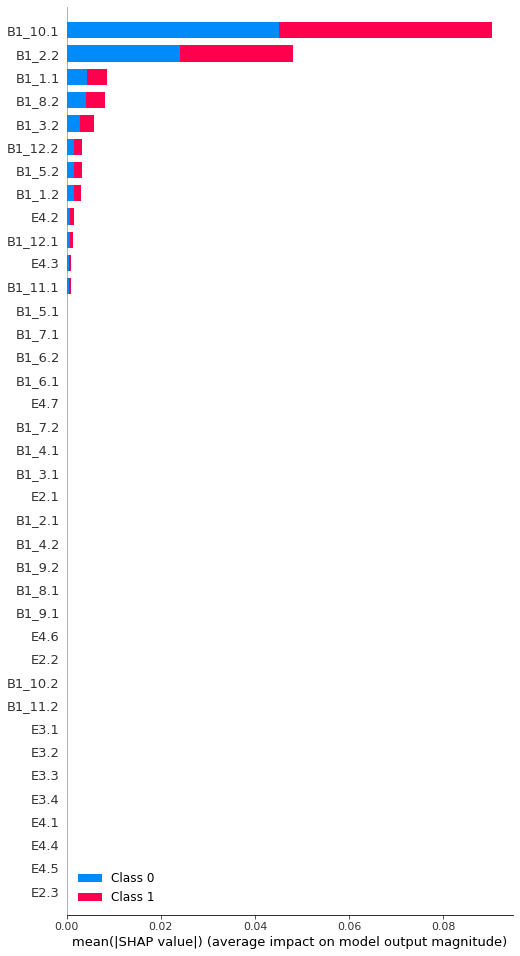

In [ ]:
shap.summary_plot(shap_values, features=X_train_NA, feature_names=X_train_NA.columns, max_display=len(X_train_NA))

## Testing BRAZIL

Accuracy: 0.6581257078142695
              precision    recall  f1-score   support

           0       0.58      0.94      0.72     51848
           1       0.90      0.42      0.57     61176

    accuracy                           0.66    113024
   macro avg       0.74      0.68      0.64    113024
weighted avg       0.75      0.66      0.64    113024

[[48978  2870]
 [35770 25406]]


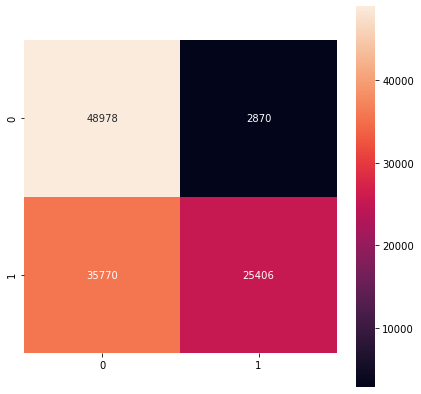

In [ ]:
y_predicted_BR = my_tree_NA.predict(X_NA_BR)

print('Accuracy:',accuracy_score(Y_NA_BR, y_predicted_BR))
print(classification_report(Y_NA_BR, y_predicted_BR))
matrix = confusion_matrix(Y_NA_BR, y_predicted_BR)
print(matrix)
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()
#print(confusion_matrix(Y_test_NA, y_predicted))

# Neural Network

## df1_ok

In [30]:
neg, pos = np.bincount(df1_ok['B8.1'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 106817
    Positive: 5337 (5.00% of total)



In [31]:
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.53
Weight for class 1: 10.01


In [32]:
def baseline_model2():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
  # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])
    return model

In [33]:
model2 = baseline_model2()

history = model2.fit(
  X_train, Y_train, batch_size = 512,
  epochs=50, validation_split = 0.1,
  class_weight=class_weight)

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Epoch 1/50
151/151 [==============================] - 19s 6ms/step - loss: 0.7640 - binary_accuracy: 0.5914 - val_loss: 0.3657 - val_binary_accuracy: 0.9413
Epoch 2/50
151/151 [==============================] - 1s 3ms/step - loss: 0.5022 - binary_accuracy: 0.7874 - val_loss: 0.3605 - val_binary_accuracy: 0.9143
Epoch 3/50
151/151 [==============================] - 0s 3ms/step - loss: 0.4628 - binary_accuracy: 0.8273 - val_loss: 0.3936 - val_binary_accuracy: 0.8868
Epoch 4/50
151/151 [==============================] - 0s 3ms/step - loss: 0.4472 - binary_accuracy: 0.8431 - val_loss: 0.4092 - val_binary_accuracy: 0.8686
Epoch 5/50
151/151 [==============================] - 0s 3ms/step - loss: 0.4303 - binary_accuracy: 0.8516 - val_loss: 0.4000 - val_binary_accuracy: 0.8768
Epoch 6/50
151/151 [==============================] - 0s 3ms/step - loss: 0.4369 

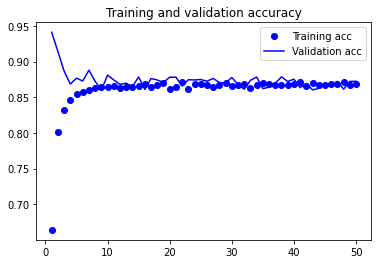

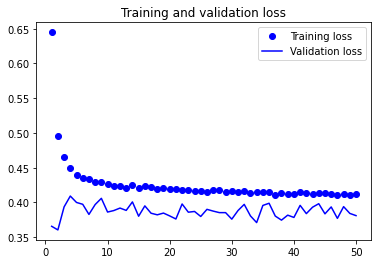

In [34]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.legend()
plt.show()

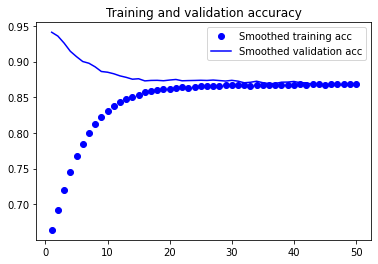

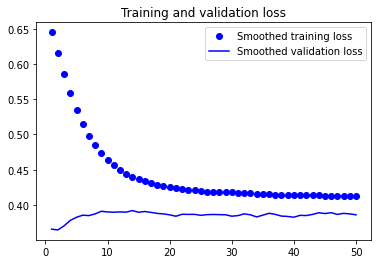

In [35]:
def smooth_curve(points, factor=0.8): 
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else: 
            smoothed_points.append(point)
    return smoothed_points
plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss') 
plt.legend()
plt.show()

In [36]:
model2.evaluate(X_test, Y_test)

668/668 [==============================] - 1s 2ms/step - loss: 0.3783 - binary_accuracy: 0.8775


[0.3783474564552307, 0.8774573802947998]

Total accuracy: 87.74574049803408 %
              precision    recall  f1-score   support

           0       0.99      0.88      0.93     20295
           1       0.25      0.74      0.38      1069

    accuracy                           0.88     21364
   macro avg       0.62      0.81      0.66     21364
weighted avg       0.95      0.88      0.90     21364

[[17950  2345]
 [  273   796]]


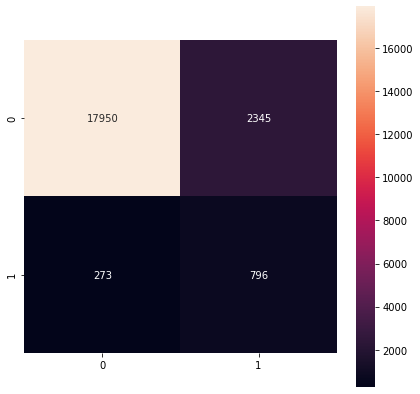

In [37]:
predicted = np.array([int(x[0] > 0.5) for x in model2.predict(X_test)])
print("Total accuracy:", np.sum(predicted==Y_test) / len(predicted) * 100., "%") 
print(classification_report(Y_test, predicted))
matrix = confusion_matrix(Y_test, predicted)
print(matrix)
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

## Testing BRAZIL

Total accuracy: 72.94731275838862 %
              precision    recall  f1-score   support

           0       0.70      0.75      0.73     40060
           1       0.76      0.71      0.73     43148

    accuracy                           0.73     83208
   macro avg       0.73      0.73      0.73     83208
weighted avg       0.73      0.73      0.73     83208

[[30181  9879]
 [12631 30517]]


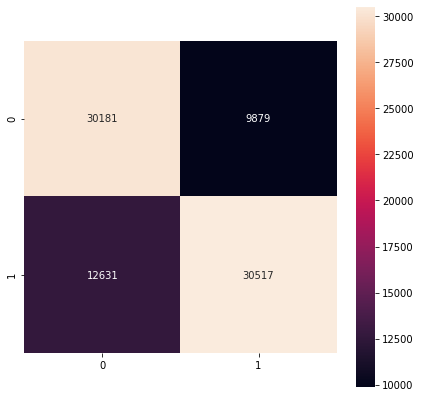

In [38]:
predicted_BR = np.array([int(x[0] > 0.5) for x in model2.predict(X_BR)])
print("Total accuracy:", np.sum(predicted_BR==Y_BR) / len(predicted_BR) * 100., "%") 
print(classification_report(Y_BR, predicted_BR))
matrix = confusion_matrix(Y_BR, predicted_BR)
print(matrix)
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

### df_ok_na

In [39]:
neg, pos = np.bincount(df_ok_NA['B8.1'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 123055
    Positive: 6606 (5.37% of total)



In [40]:
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.53
Weight for class 1: 9.31


In [41]:
def baseline_model2_NA():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train_NA.shape[1], activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])
    return model

In [42]:
model2_NA = baseline_model2_NA()

history = model2_NA.fit(
  X_train_NA, Y_train_NA, batch_size = 512,
  epochs=50, validation_split = 0.1,
  class_weight=class_weight)

Epoch 1/50
174/174 [==============================] - 2s 5ms/step - loss: 0.7906 - binary_accuracy: 0.6224 - val_loss: 0.2901 - val_binary_accuracy: 0.9482
Epoch 2/50
174/174 [==============================] - 1s 3ms/step - loss: 0.4988 - binary_accuracy: 0.8093 - val_loss: 0.3440 - val_binary_accuracy: 0.9127
Epoch 3/50
174/174 [==============================] - 1s 3ms/step - loss: 0.4676 - binary_accuracy: 0.8394 - val_loss: 0.3670 - val_binary_accuracy: 0.8950
Epoch 4/50
174/174 [==============================] - 1s 3ms/step - loss: 0.4458 - binary_accuracy: 0.8525 - val_loss: 0.3819 - val_binary_accuracy: 0.8841
Epoch 5/50
174/174 [==============================] - 1s 3ms/step - loss: 0.4355 - binary_accuracy: 0.8637 - val_loss: 0.3893 - val_binary_accuracy: 0.8733
Epoch 6/50
174/174 [==============================] - 1s 3ms/step - loss: 0.4297 - binary_accuracy: 0.8639 - val_loss: 0.3760 - val_binary_accuracy: 0.8808
Epoch 7/50
174/174 [==============================] - 1s 3ms/ste

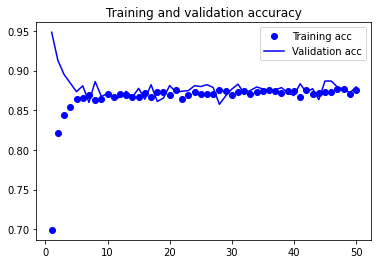

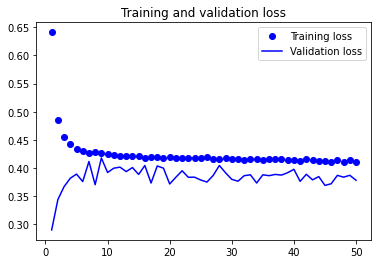

In [43]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.legend()
plt.show()

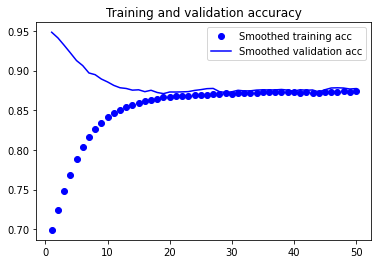

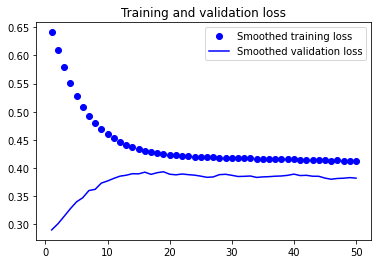

In [44]:
def smooth_curve(points, factor=0.8): 
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else: 
            smoothed_points.append(point)
    return smoothed_points
plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss') 
plt.legend()
plt.show()

In [45]:
model2_NA.evaluate(X_test_NA, Y_test_NA)

770/770 [==============================] - 1s 2ms/step - loss: 0.3770 - binary_accuracy: 0.8771


[0.37700486183166504, 0.8771281242370605]

Total accuracy: 87.71281134452074 %
              precision    recall  f1-score   support

           0       0.98      0.88      0.93     23238
           1       0.28      0.74      0.40      1373

    accuracy                           0.88     24611
   macro avg       0.63      0.81      0.67     24611
weighted avg       0.94      0.88      0.90     24611

[[20565  2673]
 [  351  1022]]


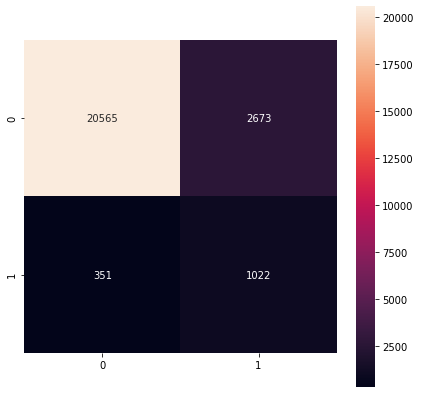

In [47]:
predicted_NA = np.array([int(x[0] > 0.5) for x in model2_NA.predict(X_test_NA)])
print("Total accuracy:", np.sum(predicted_NA==Y_test_NA) / len(predicted_NA) * 100., "%") 
print(classification_report(Y_test_NA, predicted_NA))
matrix = confusion_matrix(Y_test_NA, predicted_NA)
print(matrix)
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

## Testing BRAZIL

Total accuracy: 73.0535107587769 %
              precision    recall  f1-score   support

           0       0.69      0.76      0.72     51848
           1       0.77      0.71      0.74     61176

    accuracy                           0.73    113024
   macro avg       0.73      0.73      0.73    113024
weighted avg       0.73      0.73      0.73    113024

[[39234 12614]
 [17842 43334]]


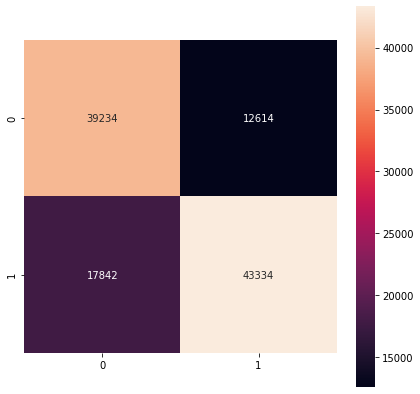

In [48]:
predicted_NA_BR = np.array([int(x[0] > 0.5) for x in model2_NA.predict(X_NA_BR)])
print("Total accuracy:", np.sum(predicted_NA_BR==Y_NA_BR) / len(predicted_NA_BR) * 100., "%") 
print(classification_report(Y_NA_BR, predicted_NA_BR))
matrix = confusion_matrix(Y_NA_BR, predicted_NA_BR)
print(matrix)
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

# Cli & Cli_who

## Cli

In [49]:
X_NA_BR = df_NA_BR['Cli']
Y_NA_BR = df_NA_BR['B8.1']

X_BR = df1_BR['Cli']
Y_BR = df1_BR['B8.1']


#X_BR=X_BR.values.reshape(-1,1)
#X_NA_BR=X_NA_BR.values.reshape(-1,1)

Accuracy: 0.5726132102682434
[[38691  1369]
 [34193  8955]]


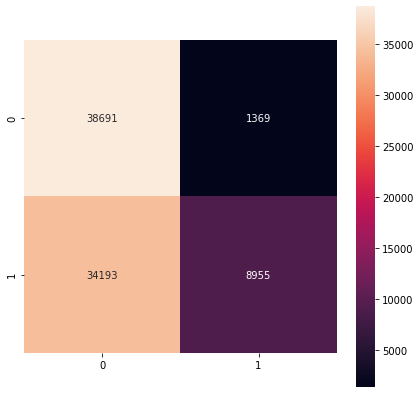

In [50]:
print('Accuracy:',accuracy_score(Y_BR,X_BR))

matrix = confusion_matrix(Y_BR, X_BR)
print(matrix)
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

Accuracy: 0.5574125849377124
[[49928  1920]
 [48103 13073]]


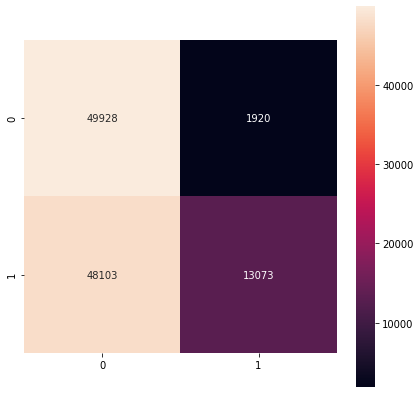

In [51]:
print('Accuracy:',accuracy_score(Y_NA_BR,X_NA_BR))

matrix = confusion_matrix(Y_NA_BR, X_NA_BR)
print(matrix)
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

## Cli_who

In [52]:
X_NA_BR = df_NA_BR['Cli_who']
Y_NA_BR = df_NA_BR['B8.1']

X_BR = df1_BR['Cli_who']
Y_BR = df1_BR['B8.1']


#X=X.values.reshape(-1,1)
#X_NA=X_NA.values.reshape(-1,1)

Accuracy: 0.5555355254302471
[[39159   901]
 [36082  7066]]


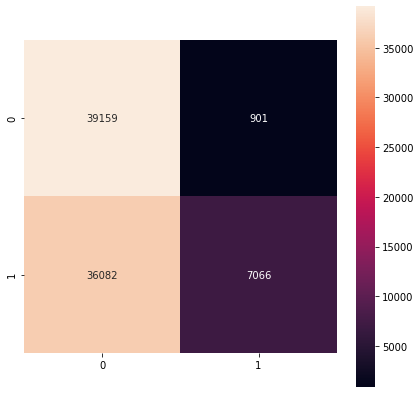

In [53]:
print('Accuracy:',accuracy_score(Y_BR,X_BR))

matrix = confusion_matrix(Y_BR, X_BR)
print(matrix)
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

Accuracy: 0.5376557191392979
[[50582  1266]
 [50990 10186]]


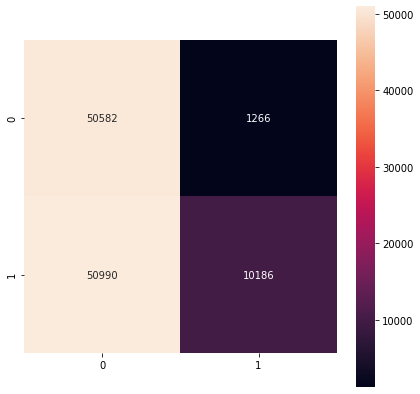

In [54]:
print('Accuracy:',accuracy_score(Y_NA_BR,X_NA_BR))

matrix = confusion_matrix(Y_NA_BR, X_NA_BR)
print(matrix)
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()